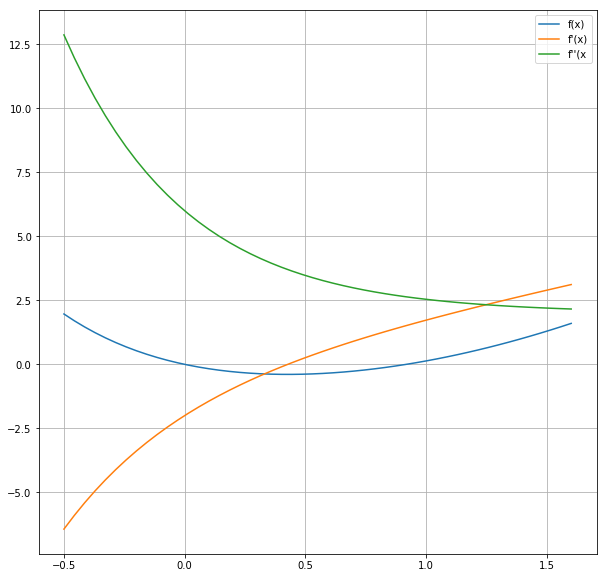

In [135]:
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return np.e**(-2*x)+x**2-1
def fp1(x):
    return -2*np.e**(-2*x)+2*x
def fp2(x):
    return 4*np.e**(-2*x)+2
x = np.linspace(-0.5,1.6)

y=f(x)
fig,ax = plt.subplots()
ax.plot(x,y, label='f(x)')

y1=fp1(x)
plt.plot(x,y1, label='f\'(x)')
y2=fp2(x)
plt.plot(x,y2, label='f\'\'(x')
plt.rcParams["figure.figsize"] = [10, 10]
plt.grid()
plt.legend()
plt.show()

In [136]:
import time
def bisekc(f,x,y,precision,max_iter):
    a=x
    b=y
    iterations=1
    while(abs(b-a)>precision and iterations<max_iter):
        iterations+=1
        x1=(a+b)/2     
        if(f(x1)*f(a))<0:
            b=x1
        if(f(x1)*f(b))<0:
            a=x1
    return {'Miejsce Zerowe':(a+b)/2, 'Liczba iteracji':iterations}
    
c1= time.clock()
print(bisekc(f,0.5,1.2,10**(-10),100))
c2=time.clock()
c_func=c2-c1
print("Czas wykonania:",c_func)


c1= time.clock()
print("Miejsce zerowe obliczone algorytmem z biblioteki scipy:",scipy.optimize.bisect(f,0.5,1.2))
c2=time.clock()
c_scipy=c2-c1
print("Czas wykonania algorytmu z biblioteki scipy:",c_scipy)
print("Czas wykonania napisanego algorytmu - czas wykonania algorytmu z biblioteki scipy",c_func-c_scipy,"s")


{'Miejsce Zerowe': 0.9165625831054058, 'Liczba iteracji': 34}
Czas wykonania: 0.0002220249989477452
Miejsce zerowe obliczone algorytmem z biblioteki scipy: 0.9165625831066792
Czas wykonania algorytmu z biblioteki scipy: 0.0001430120028089732
Czas wykonania napisanego algorytmu - czas wykonania lagorytmu zapewnionego w bibliotece 7.9012996138772e-05 s


C:\Users\barle\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app
C:\Users\barle\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\barle\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\barle\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Warunki:
Funkcja musi być ciągła w przedziale domkniętym [a,b]
Funckja musi przyjmować różne znaki na krańcach przedziału

In [137]:
def newton_raphson(f,fp1,x,precision,max_iter):
    old_a=x
    a=(-f(x))/fp1(x)+x
    newY=abs(f(a))
    iterations=1
    while (abs(a-old_a)>precision and iterations<max_iter):
        old_a=a
        a=(-f(a))/fp1(a)+a
        newY=abs(f(a))
        iterations+=1
    return {'Miejsce Zerowe':a, 'Liczba iteracji':iterations}
c1= time.clock()
print(newton_raphson(f,fp1,0.5,10**(-10),100))
c2=time.clock()
c_func=c2-c1
print("Czas wykonania:",c_func)

c1= time.clock()
print("Miejsce zerowe obliczone algorytmem z biblioteki scipy:",scipy.optimize.newton(f,0.5,fp1))
c2=time.clock()
c_scipy=c2-c1
print("Czas wykonania algorytmu z biblioteki scipy:",c_scipy)
print("Czas wykonania napisanego algorytmu - czas wykonania algorytmu z biblioteki scipy",c_func-c_scipy,"s")

{'Miejsce Zerowe': 0.916562583105698, 'Liczba iteracji': 7}
Czas wykonania: 0.0001473580014135223
Miejsce zerowe obliczone algorytmem z biblioteki scipy: 0.916562583105698
Czas wykonania algorytmu z biblioteki scipy: 0.0001240499987034127
Czas wykonania napisanego algorytmu - czas wykonania lagorytmu zapewnionego w bibliotece 2.3308002710109577e-05 s


C:\Users\barle\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
C:\Users\barle\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\barle\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\barle\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Warunki dla metody Newtona:
Funkcja musi być ciągła
Funckja musi przyjmować różne znaki na krańcach przedziału
Pierwsza i druga pochodna funkcji muszą istnieć i  mieć stały znak w przedziale

In [138]:
def sieczne(f,x,precision,max_iter):
    x1=x
    x2=x1+0.7
    iterations=1
    x3=(f(x2)*x1-f(x1)*x2)/(f(x2)-f(x1))
    y=abs(f(x3))
    while (abs(x3-x2)>precision and iterations<max_iter):
        iterations+=1
        x1=x2
        x2=x3
        x3=(f(x2)*x1-f(x1)*x2)/(f(x2)-f(x1))
        y=abs(f(x3))
    return {'Miejsce Zerowe':x3, 'Liczba iteracji':iterations}
c1= time.clock()
print(sieczne(f,0.5,10**(-10),100))
c2=time.clock()
c_func=c2-c1
print("Czas wykonania:",c_func)
c1= time.clock()
print("Miejsce zerowe obliczone algorytmem z biblioteki scipy:",scipy.optimize.newton(f,0.5))
c2=time.clock()
c_scipy=c2-c1
print("Czas wykonania algorytmu z biblioteki scipy:",c_scipy)
print("Czas wykonania napisanego algorytmu - czas wykonania algorytmu z biblioteki scipy",c_func-c_scipy,"s")

{'Miejsce Zerowe': 0.9165625831056982, 'Liczba iteracji': 7}
Czas wykonania: 0.0006558019995281938
Miejsce zerowe obliczone algorytmem z biblioteki scipy: 0.9165625831056979
Czas wykonania algorytmu z biblioteki scipy: 0.00018133300181943923
Czas wykonania napisanego algorytmu - czas wykonania lagorytmu zapewnionego w bibliotece 0.0004744689977087546 s


C:\Users\barle\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\barle\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
C:\Users\barle\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\barle\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Warunki:
Funkcja musi być ciągła
Pierwsza i druga pochodna funkcji muszą istnieć i  mieć stały znak w przedziale

Funkcja realizująca wyszukiwanie miejsc zerowych metodą bisekcji jest najwolniejsza i wykonuje największą liczbę iteracji.
Funkcje realizujące wyszukiwanie miejsc zerowych metodą Newtona i Siecznych są szybsze i wykonują znacznie wielokrotnie mniej iteracji.